### MNIST with CNN

In [66]:
pip install livelossplot

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [67]:
import numpy as np
np.random.seed(0) 

#Tensorflow
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import mnist

from livelossplot import PlotLossesKeras #<= automatyczne tworzenie krzywej uczenia się

import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


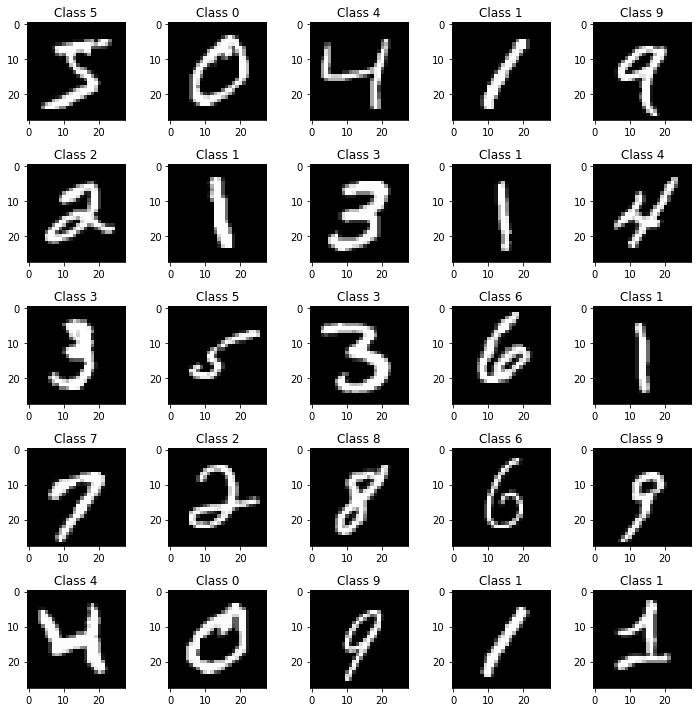

In [69]:
fig = plt.figure(figsize=(10, 10))
for idx in range(25):
    plt.subplot(5,5,idx+1)
    plt.imshow(X_train[idx], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[idx]))
    
plt.tight_layout()

In [70]:
K.image_data_format() # musimy kanal dodal na koncu wymiarow - dane mają miec cztery wymiary: liczba obiektów, rozmiar zdjęcia 28x28 i liczba kanałów.

'channels_last'

In [71]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_last':
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
else:
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
    
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### Normalizacja wartości

In [72]:
# normalizacja danych
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

num_classes = 10

# one-hot encoding dla zmiennej docelowej
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Architektura

In [73]:
def get_simple_cnn():
    return Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25), 
        
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Flatten(), # spłaszczanie danych, aby połączyć warstwy konwolucyjne z fully connected layers
        
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

get_simple_cnn().summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 1600)            

In [74]:
input_shape

(28, 28, 1)

In [75]:
model = get_simple_cnn()
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

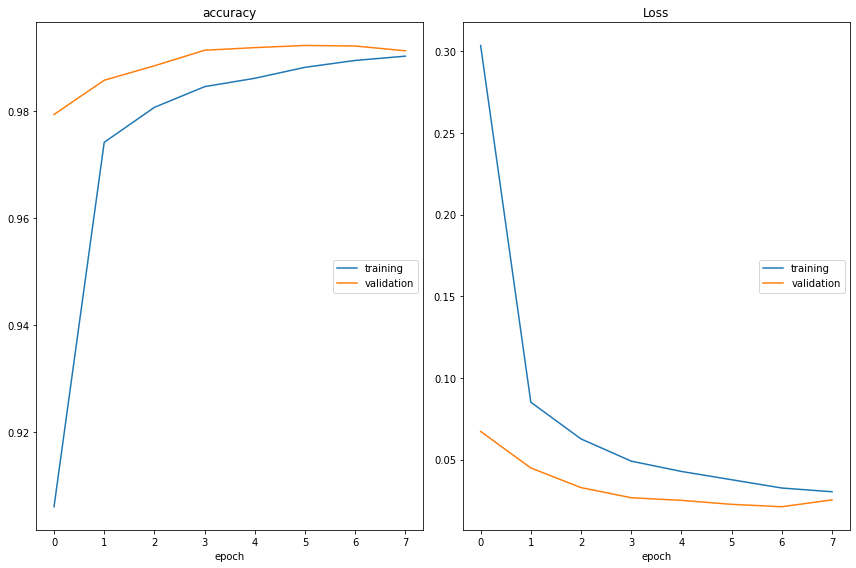

accuracy
	training         	 (min:    0.906, max:    0.990, cur:    0.990)
	validation       	 (min:    0.979, max:    0.992, cur:    0.991)
Loss
	training         	 (min:    0.030, max:    0.304, cur:    0.030)
	validation       	 (min:    0.021, max:    0.067, cur:    0.025)


In [76]:
plot_losses = PlotLossesKeras()

history = model.fit(X_train, y_train,
  batch_size=256, epochs=8,
  verbose=2,
  callbacks=[plot_losses],
  validation_data=(X_test, y_test)
)

In [77]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("CNN Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.025370728224515915
Test accuracy: 0.9911999702453613
CNN Error: 0.88%


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
cnt = Counter(y_train)

plt.figure(figsize=(18, 5))
plt.title('Liczba wystąpień poszczególnych znaków')
plt.bar(list(cnt.keys()),list(cnt.values()))
plt.xlabel('Znaki')
plt.xticks(range(len(traffic_labels_dict)), [x[1] for x in traffic_labels_dict.items()], rotation=90)
plt.ylabel('Ilość per znak')
plt.show()

### Architektura 2 conv + conv + pool

In [22]:
def get_double_cnn():
    return Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25), 
        
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Flatten(), # spłaszczanie danych, aby połączyć warstwy konwolucyjne z fully connected layers
        
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

model = get_double_cnn()
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 64)         

In [24]:
history = model.fit(X_train, y_train,
          batch_size=256,
          epochs=12,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/12
235/235 [==============================] - 122s 515ms/step - loss: 0.3036 - accuracy: 0.9026 - val_loss: 0.0447 - val_accuracy: 0.9840
Epoch 2/12
235/235 [==============================] - 125s 533ms/step - loss: 0.0722 - accuracy: 0.9777 - val_loss: 0.0316 - val_accuracy: 0.9896
Epoch 3/12
235/235 [==============================] - 138s 588ms/step - loss: 0.0524 - accuracy: 0.9839 - val_loss: 0.0283 - val_accuracy: 0.9901
Epoch 4/12
235/235 [==============================] - 107s 454ms/step - loss: 0.0437 - accuracy: 0.9862 - val_loss: 0.0229 - val_accuracy: 0.9920
Epoch 5/12
235/235 [==============================] - 181s 773ms/step - loss: 0.0384 - accuracy: 0.9876 - val_loss: 0.0221 - val_accuracy: 0.9933
Epoch 6/12
235/235 [==============================] - 258s 1s/step - loss: 0.0317 - accuracy: 0.9896 - val_loss: 0.0195 - val_accuracy: 0.9938
Epoch 7/12
235/235 [==============================] - 2090s 9s/step - loss: 0.0281 - accuracy: 0.9913 - val_loss: 0.0191 - val_

In [25]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("CNN Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.01810990832746029
Test accuracy: 0.9944999814033508
CNN Error: 0.55%


In [29]:
def draw_learning_curve(history, key='accuracy', ylim=(0.8, 1.01)):
    plt.figure(figsize=(12,6))
    plt.plot(history.history[key])
    plt.plot(history.history['val_' + key])
    plt.title('Learning Curve')
    plt.ylabel(key.title())
    plt.xlabel('Epoch')
    plt.ylim(ylim)
    plt.legend(['train', 'test'], loc='best')
    plt.show()

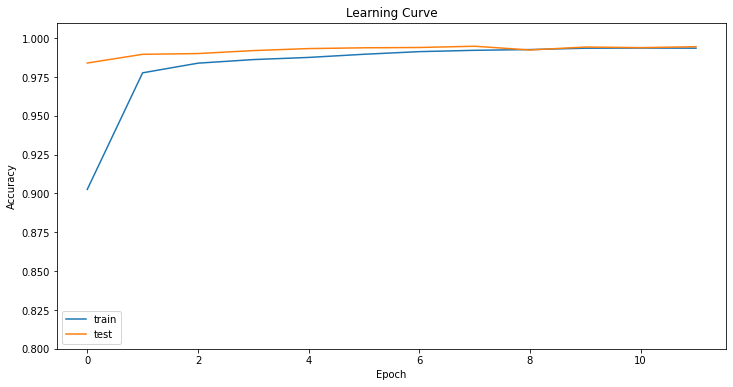

In [30]:
draw_learning_curve(history, key='accuracy', ylim=(0.8, 1.01))

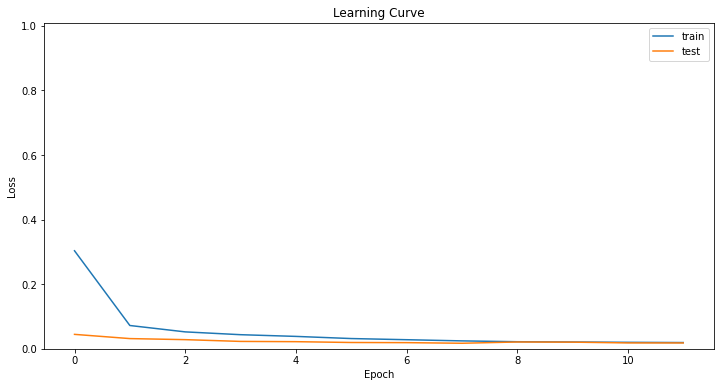

In [32]:
draw_learning_curve(history, key='loss', ylim=(0, 1.01))

In [34]:
y_pred = model.predict(X_test)

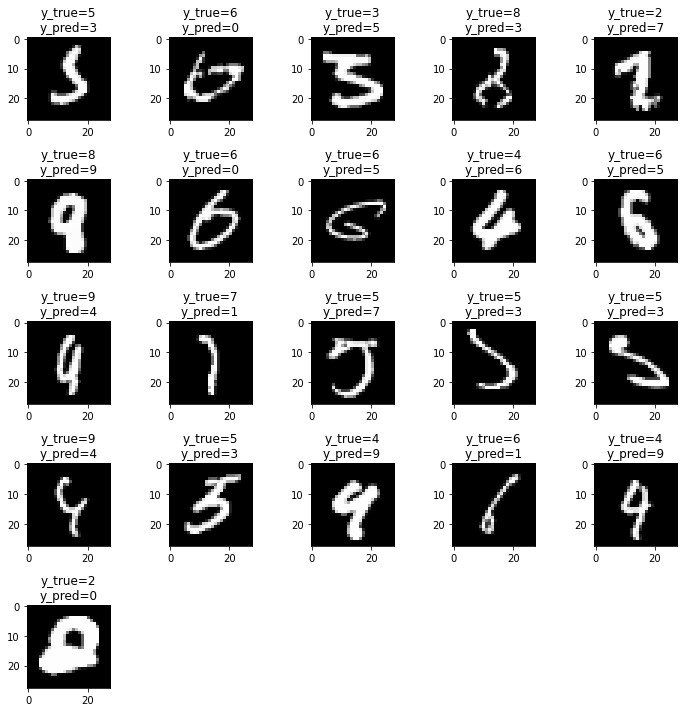

In [36]:
def get_diff(y_test, y_pred):
    for idx, (a, b) in enumerate(zip(y_test, y_pred)):
        if np.argmax(a) == np.argmax(b): continue
        yield idx, np.argmax(a), np.argmax(b)

limit = 20
cur_limit = 0
fig = plt.figure(figsize=(10, 10))
X_test_plot = X_test.reshape( X_test.shape[:-1] )

for it, (idx, y_test_val, y_pred_val) in enumerate(get_diff(y_test, y_pred)):
    if cur_limit > limit: break
      
    plt.subplot(5,5,it+1)
    plt.imshow(X_test_plot[idx], cmap='gray', interpolation='none')
    plt.title('y_true={0}\ny_pred={1}'.format(y_test_val, y_pred_val))
    plt.tight_layout()
        
    cur_limit += 1

### Architecture 3 

In [47]:
def get_triple_cnn():
    return Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding="same"),
        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25), 
        
        Conv2D(64, kernel_size=(3, 3), activation='relu',padding="same"),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(128, kernel_size=(3, 3), activation='relu',padding="same"),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.1),
        
        Flatten(), # spłaszczanie danych, aby połączyć warstwy konwolucyjne z fully connected layers
        
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

model = get_triple_cnn()
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 5, 5, 64)        

In [48]:
history = model.fit(X_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/12
469/469 [==============================] - 182s 385ms/step - loss: 0.7322 - accuracy: 0.7502 - val_loss: 0.0425 - val_accuracy: 0.9869
Epoch 2/12
469/469 [==============================] - 163s 347ms/step - loss: 0.0880 - accuracy: 0.9764 - val_loss: 0.0342 - val_accuracy: 0.9902
Epoch 3/12
469/469 [==============================] - 158s 338ms/step - loss: 0.0596 - accuracy: 0.9836 - val_loss: 0.0314 - val_accuracy: 0.9904
Epoch 4/12
469/469 [==============================] - 177s 377ms/step - loss: 0.0420 - accuracy: 0.9875 - val_loss: 0.0288 - val_accuracy: 0.9921
Epoch 5/12
469/469 [==============================] - 187s 398ms/step - loss: 0.0362 - accuracy: 0.9902 - val_loss: 0.0256 - val_accuracy: 0.9925
Epoch 6/12
469/469 [==============================] - 172s 367ms/step - loss: 0.0314 - accuracy: 0.9914 - val_loss: 0.0199 - val_accuracy: 0.9926
Epoch 7/12
469/469 [==============================] - 159s 339ms/step - loss: 0.0298 - accuracy: 0.9913 - val_loss: 0.0208 -

In [49]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("CNN Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.02734600193798542
Test accuracy: 0.993399977684021
CNN Error: 0.66%


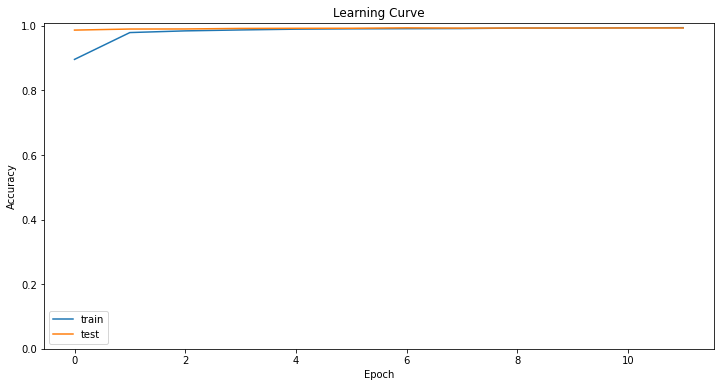

In [50]:
draw_learning_curve(history, key='accuracy', ylim=(0, 1.01))

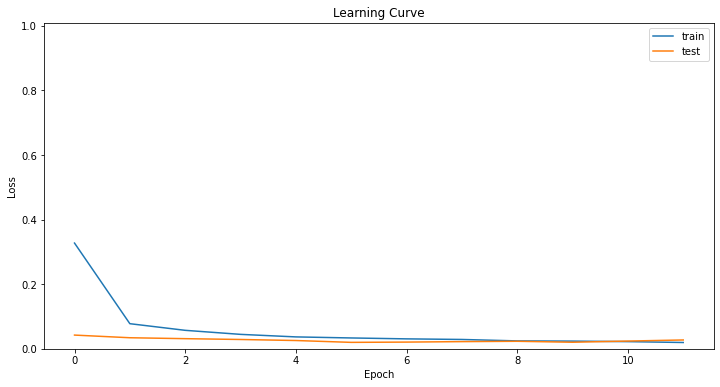

In [51]:
draw_learning_curve(history, key='loss', ylim=(0, 1.01))

In [52]:
y_pred = model.predict(X_test)

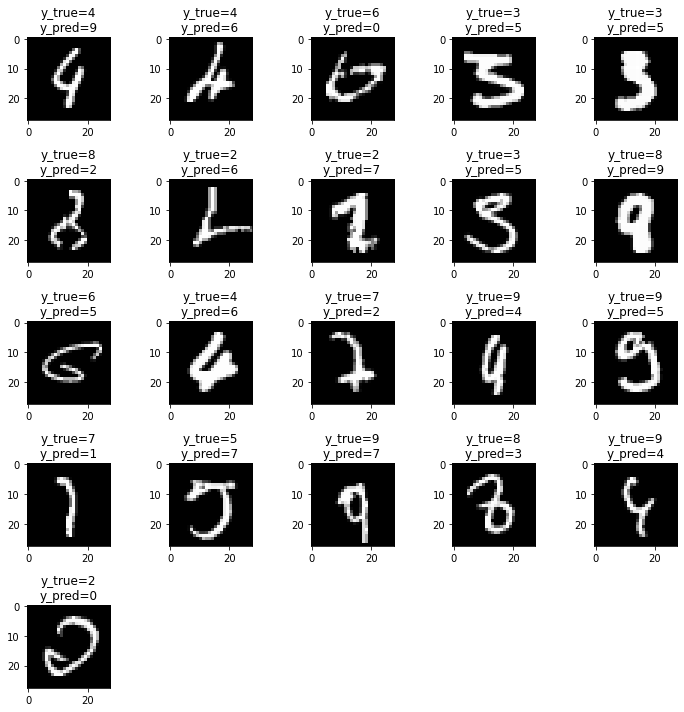

In [55]:
get_diff(y_test, y_pred)

limit = 20
cur_limit = 0
fig = plt.figure(figsize=(10, 10))
X_test_plot = X_test.reshape( X_test.shape[:-1] )

for it, (idx, y_test_val, y_pred_val) in enumerate(get_diff(y_test, y_pred)):
    if cur_limit > limit: break
      
    plt.subplot(5,5,it+1)
    plt.imshow(X_test_plot[idx], cmap='gray', interpolation='none')
    plt.title('y_true={0}\ny_pred={1}'.format(y_test_val, y_pred_val))
    plt.tight_layout()
        
    cur_limit += 1

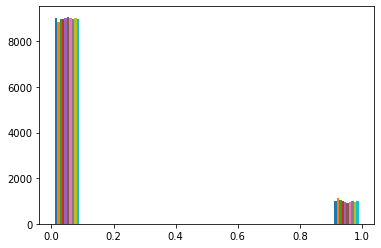

In [65]:
[x for x in traffic_labels_dict.items()]

In [59]:
y_pred[0] #7

array([8.1592529e-13, 2.0790078e-13, 3.4994826e-11, 1.2341495e-12,
       2.7724243e-11, 8.6646227e-15, 2.1491936e-19, 1.0000000e+00,
       2.1363984e-14, 1.7471292e-11], dtype=float32)

In [60]:
y_test[0] #7

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

RuntimeError: matplotlib does not support generators as input

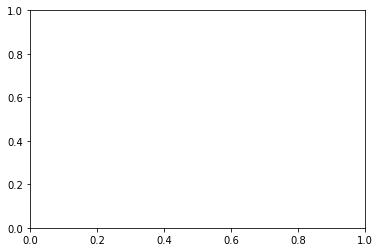